# Exploratory Data analysis and Predictive Modelling Algorithm For Diabetes

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes
based on certain diagnostic measurements included in the dataset. Several constraints were placed
on the selection of these instances from a larger database. In particular, all patients here are females
at least 21 years old of Pima Indian heritage.2
From the data set in the (.csv) File We can find several variables, some of them are independent
(several medical predictor variables) and only one target dependent variable (Outcome).


Aim: To use the knowledge of EDA and machine learning to derive insight from the data and make good predictive algorithm based on the Diagnotic measurement given from the data.
    
    
The Data would be thoroughly cleaned and analysed and will use different machine learning algorithm and considering the one that works best.

### Importing Neccesary Libraries

In [1]:
#Libraries for Data cleaning and analysis
import pandas as pd
import numpy as np


#Libraries for Data Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data for machine learning algorithm modelling and predicting and scoring
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
#from catboost import CatBoostRegressor
#from xgboost import XGBRegressor




#Libraries to avoid errors
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the data from csv into our project as a Dataframe format.
data = pd.read_csv("diabetes.csv")
data.head(20)   #Viewing the first 20 rows 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
#getting the Number of columns in the data set

data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
data.shape
print(f'The shape of the data is {data.shape}')

The shape of the data is (768, 9)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
#Checking for null values int the data
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
#Checking for duplicates in the data
data.duplicated().sum()

0

In [8]:
#Getting the number of unique values for all the columns

data.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [9]:
# Looking into the statistical summary of the data
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
#Checking for the correlation of the data

data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


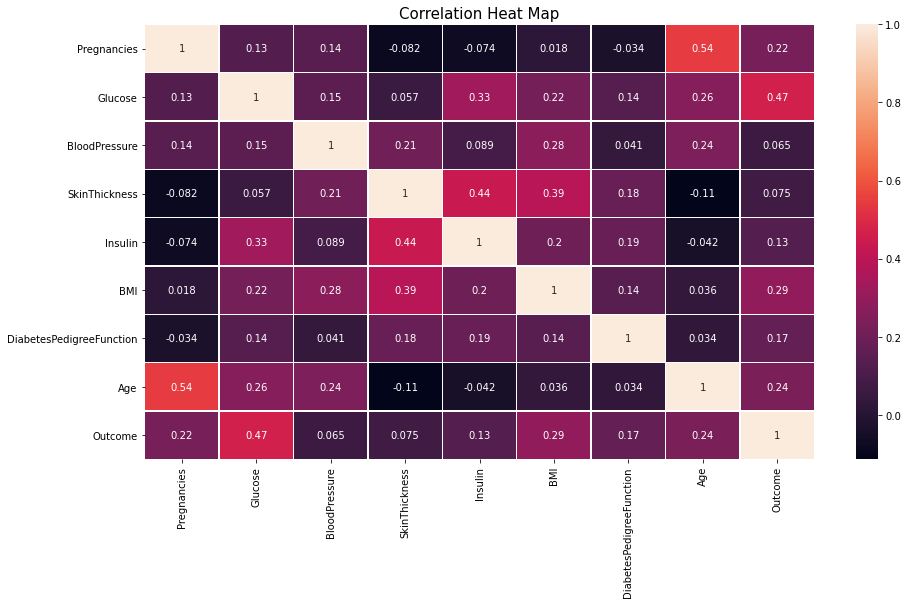

In [11]:
# multivariate analysis
# lets check the Heat Map for the Data with respect to correlation.

plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(data.corr(), annot = True, linewidth = 0.5, linewidths=.5)
plt.title('Correlation Heat Map', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

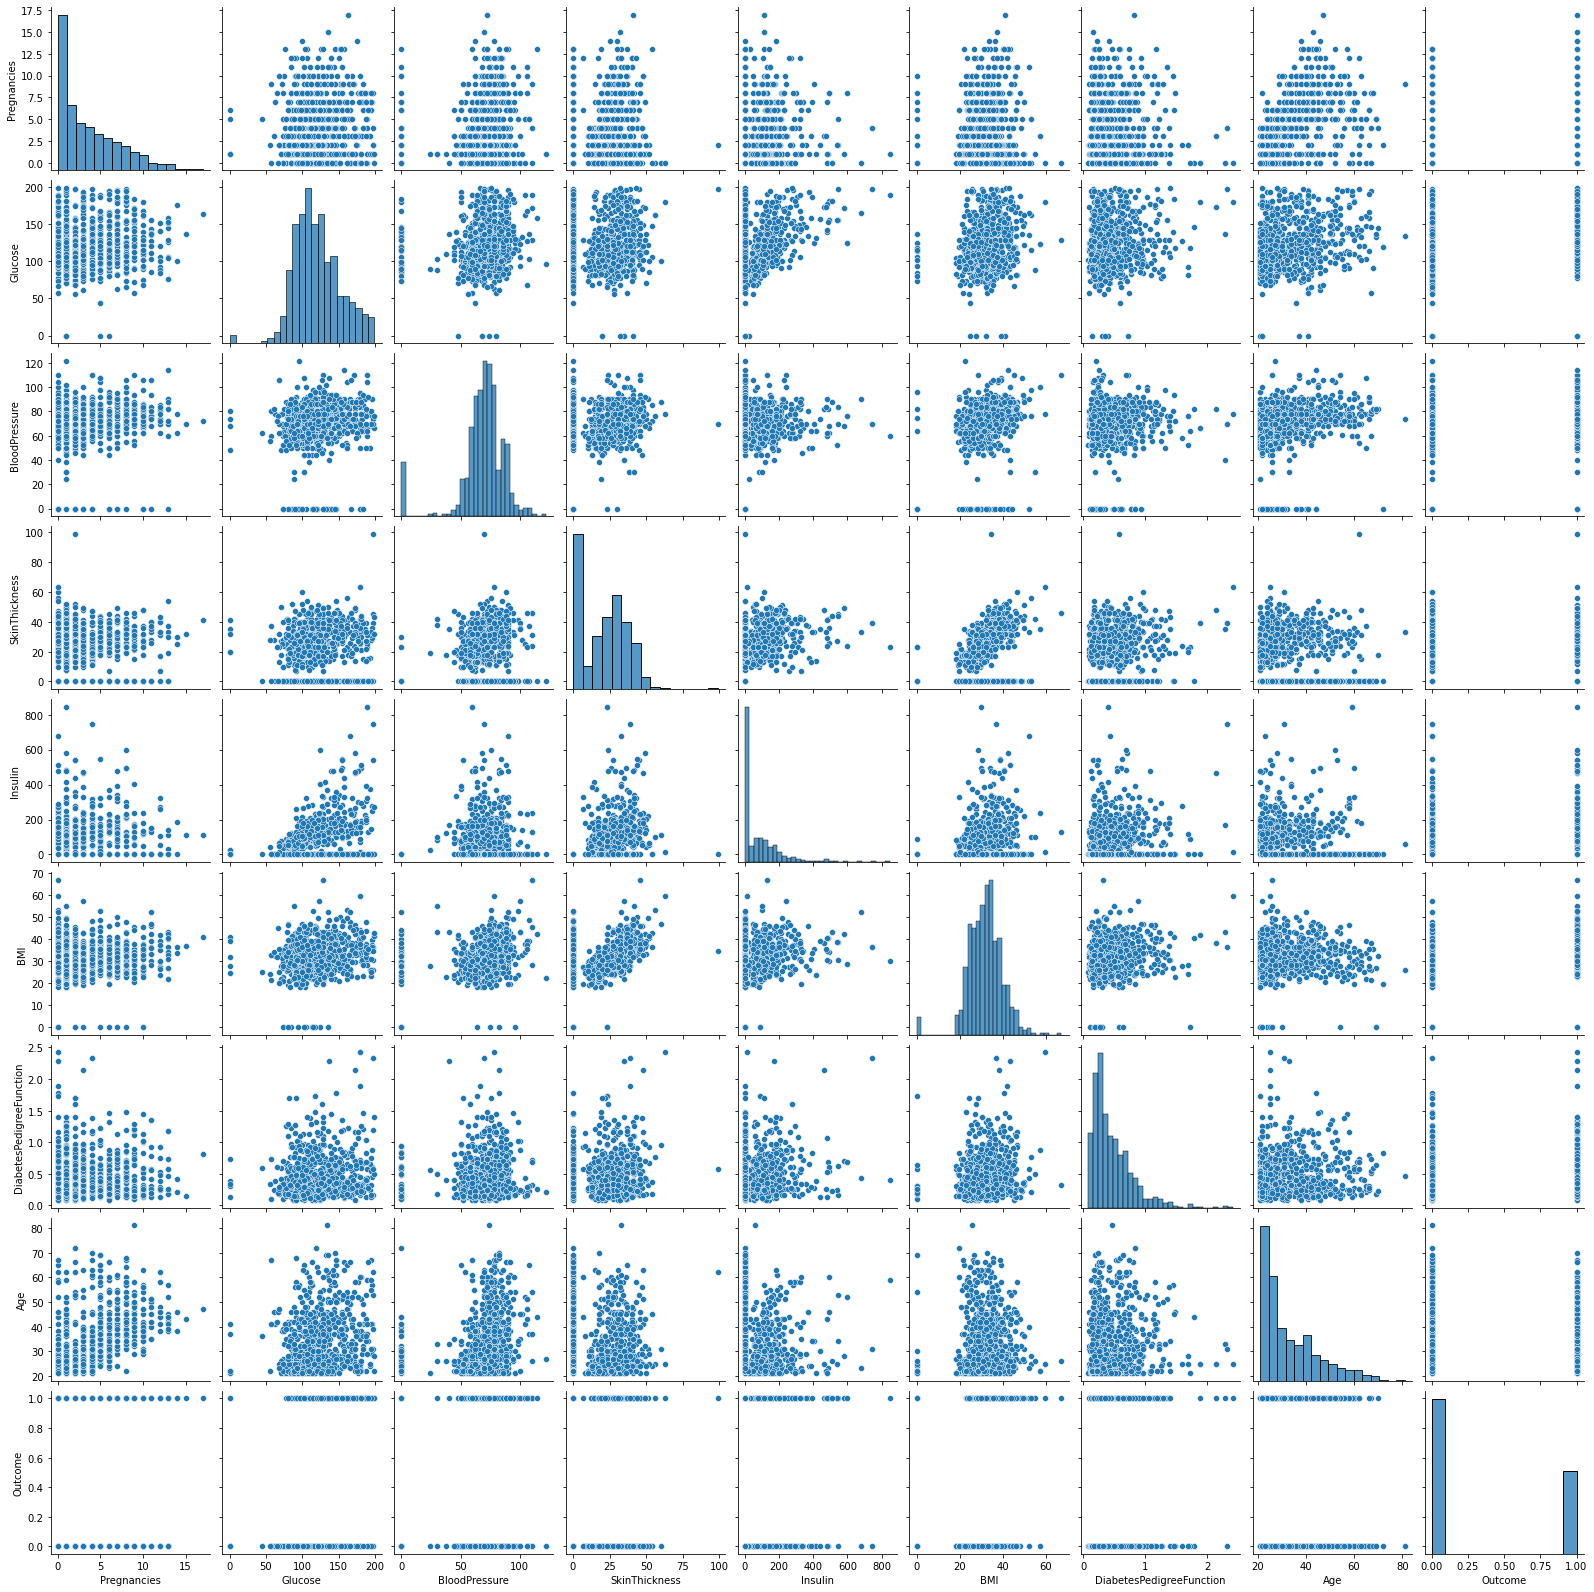

In [12]:
# Visualizing our correlation
import seaborn as sns
sns.pairplot(data)

In [13]:
#Checking the Outliers present in the data

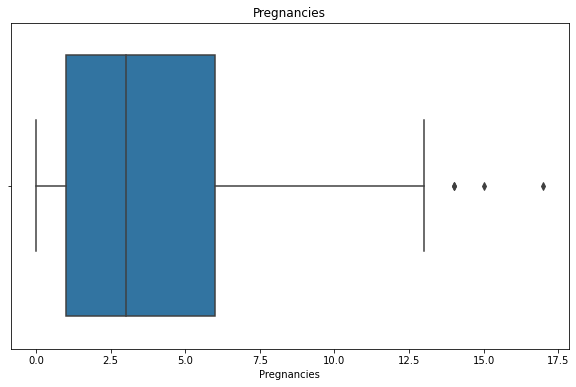

In [14]:
plt.figure(figsize=(10,6))
sns.boxplot(data['Pregnancies'])
plt.title('Pregnancies')
plt.show()

In [15]:
data = data[data['Pregnancies']<13]
# Getting rid of the outliers

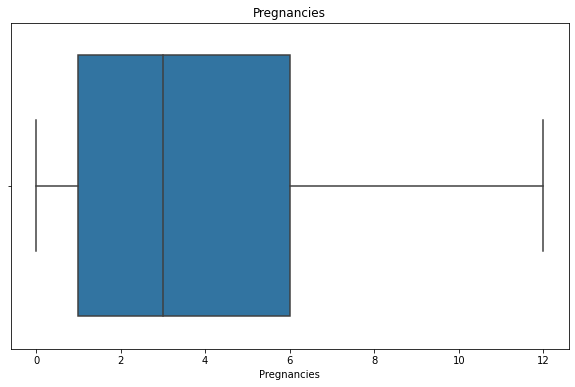

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(data['Pregnancies'])
plt.title('Pregnancies')
plt.show()

So we no longer have Outliers in the pregnancies column

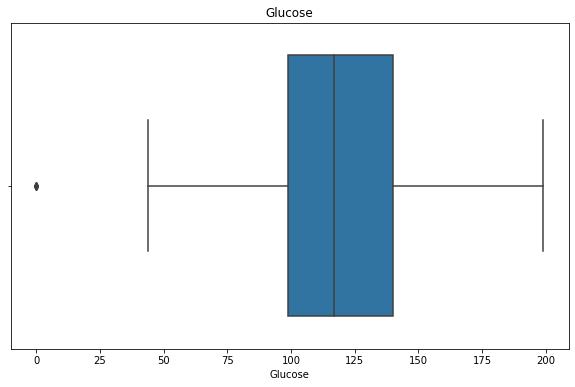

In [17]:
plt.figure(figsize=(10,6))

sns.boxplot(data['Glucose'])
plt.title('Glucose')
plt.show()

In [18]:
data = data[data['Glucose']>1]

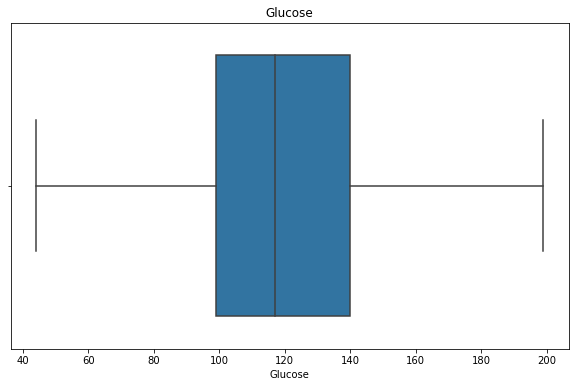

In [19]:
plt.figure(figsize=(10,6))

sns.boxplot(data['Glucose'])
plt.title('Glucose')
plt.show()

So we no longer have Outliers on the Glucose Column

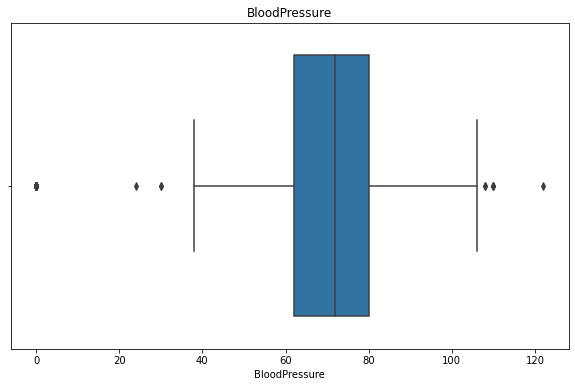

In [20]:
plt.figure(figsize=(10,6))

sns.boxplot(data['BloodPressure'])
plt.title('BloodPressure')
plt.show()

In [21]:
data = data[data['BloodPressure']<105]
data = data[data['BloodPressure']>40]

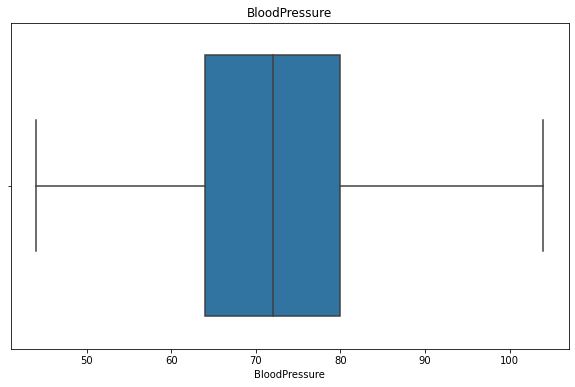

In [22]:
plt.figure(figsize=(10,6))

sns.boxplot(data['BloodPressure'])
plt.title('BloodPressure')
plt.show()

So we no longer have outliers in the Blood

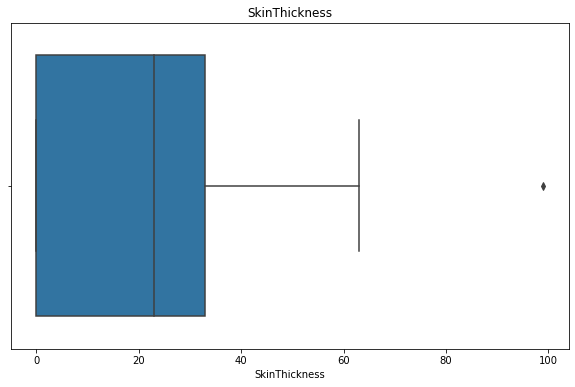

In [23]:
plt.figure(figsize=(10,6))

sns.boxplot(data['SkinThickness'])
plt.title('SkinThickness')
plt.show()

### Univariate Analysis

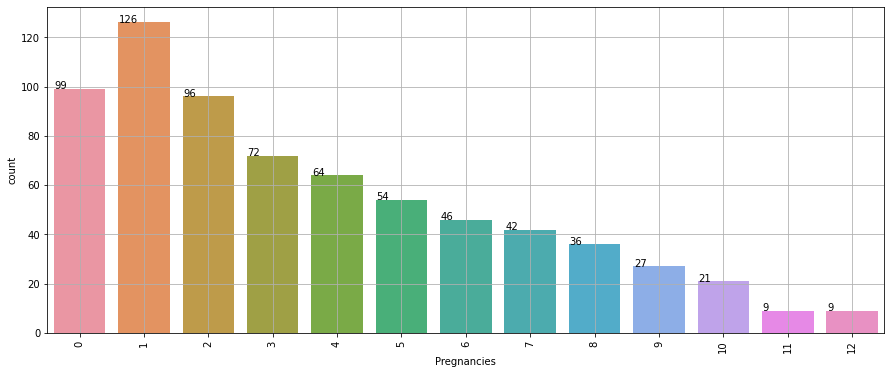

In [24]:
plt.figure(figsize=(15,6))
a=sns.countplot(data['Pregnancies'])
for p in a.patches:
    a.annotate('{:}'.format(p.get_height()),
               (p.get_x()+0.01, p.get_height()+0.01))
plt.grid()
plt.xticks(rotation = 90)
plt.show()

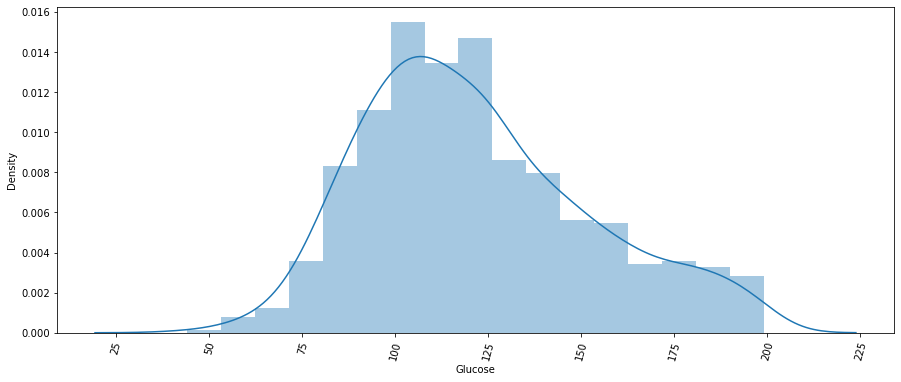

In [25]:
plt.figure(figsize=(15,6))
sns.distplot(data['Glucose'])
plt.xticks(rotation = 75)
plt.show()

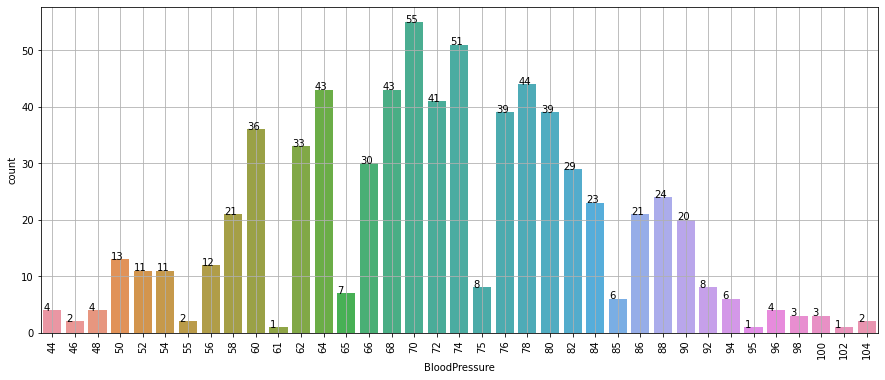

In [26]:
plt.figure(figsize=(15,6))
a=sns.countplot(data['BloodPressure'])
for p in a.patches:
    a.annotate('{:}'.format(p.get_height()),
               (p.get_x()+0.01, p.get_height()+0.01))
plt.grid()
plt.xticks(rotation = 90)
plt.show()

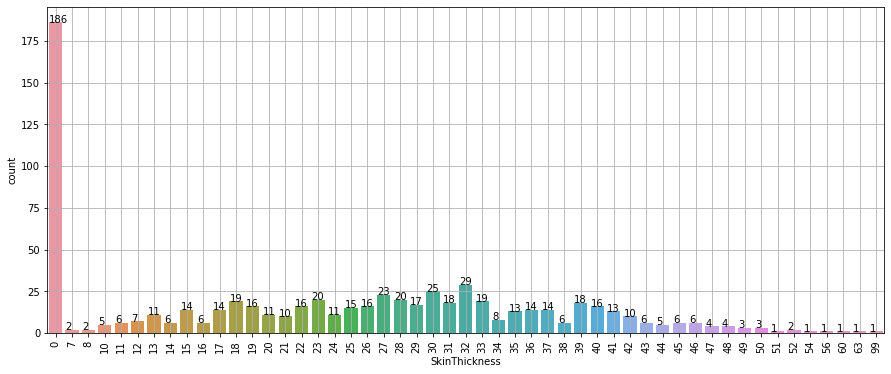

In [27]:
plt.figure(figsize=(15,6))
a=sns.countplot(data['SkinThickness'])
for p in a.patches:
    a.annotate('{:}'.format(p.get_height()),
               (p.get_x()+0.01, p.get_height()+0.01))
plt.grid()
plt.xticks(rotation = 90)
plt.show()

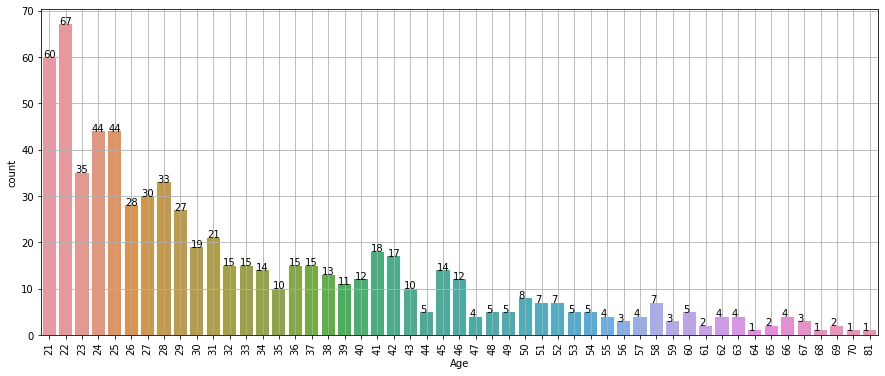

In [28]:
plt.figure(figsize=(15,6))
a=sns.countplot(data['Age'])
for p in a.patches:
    a.annotate('{:}'.format(p.get_height()),
               (p.get_x()+0.01, p.get_height()+0.01))
plt.grid()
plt.xticks(rotation = 90)
plt.show()

### Bivariate Analysis

<AxesSubplot:xlabel='BloodPressure', ylabel='SkinThickness'>

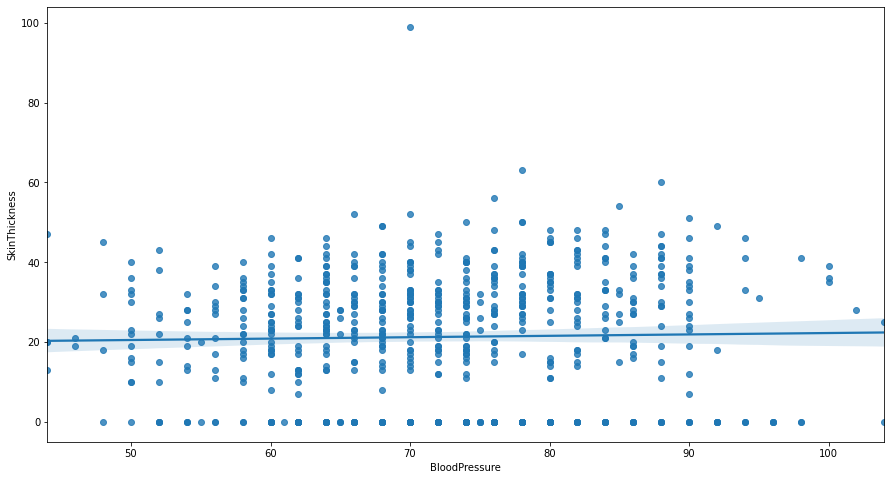

In [29]:
sns.regplot( x='BloodPressure',y='SkinThickness', data=data)

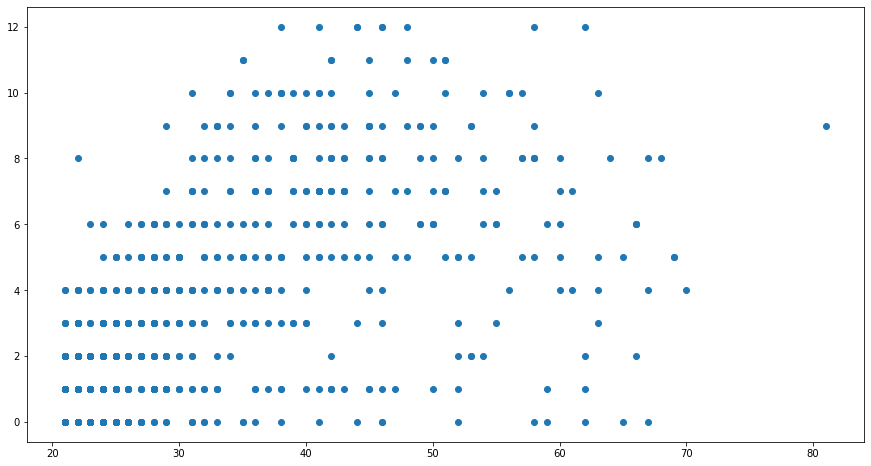

In [30]:
# A Plot showing the correlation of CRIM and PRICES
plt.scatter(data['Age'],data['Pregnancies'])

## Splitting Data

In [31]:
X = data.drop(columns=['Outcome'],axis=1)
y=data['Outcome']

In [32]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
5,5,116,74,0,0,25.6,0.201,30


In [33]:
y.head()

0    1
1    0
2    1
3    0
5    0
Name: Outcome, dtype: int64

<AxesSubplot:>

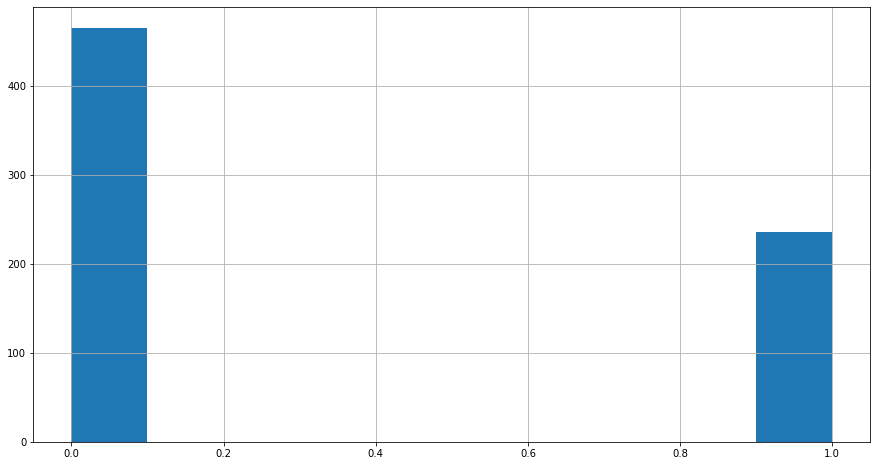

In [34]:
data.Outcome.hist()

In [35]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [37]:
sc_x=StandardScaler()
X_train= sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [38]:
from sklearn.linear_model import LogisticRegression   # Importing our linear model
from sklearn.model_selection import GridSearchCV    # Importing our hyperparameter tuning library


param_lrg = {
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'dual':[True, False] ,
    'fit_intercept':[True, False] ,
    'solver' :['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'] ,
    'max_iter' :[1,10,20,30,40,50,60,70,80,90,100] ,
    'multi_class' :['auto', 'ovr', 'multinomial'] ,
    'warm_start':[True, False] 
}


lrg=LogisticRegression()


grid_lrg = GridSearchCV(estimator=lrg, param_grid=param_lrg, cv=5, scoring='accuracy')
grid_lrg.fit(X_train, y_train)  # Fitting our training data to our model


print(f"Best hyperparameters: {grid_lrg.best_params_}")  # determining our best parameter
print(f"Best score: {grid_lrg.best_score_}")   # Our Best score


best_lrg = LogisticRegression(**grid_lrg.best_params_)    # Using our best parameters to set our new model
best_lrg.fit(X_train, y_train)     # Fit our training dataset to our new model

test_score = best_lrg.score(X_test, y_test)   # Getting our accuracy score
print(f"Test score: {test_score}")


Best hyperparameters: {'dual': False, 'fit_intercept': True, 'max_iter': 1, 'multi_class': 'multinomial', 'penalty': 'l1', 'solver': 'saga', 'warm_start': False}
Best score: 0.7877551020408164
Test score: 0.7677725118483413


So using Logistic Regression, we could see we got accuracy score of 76.77%